In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler


In [5]:
df = pd.read_csv('../data/df_train.csv')
df_test = pd.read_csv('../data/df_test.csv')



### Functions


In [6]:
def normalize_column(df, column):
    return RobustScaler().fit_transform(np.array(df[column]).reshape(-1, 1))

In [8]:
def prepare_data(df):
    for col in df.columns:
        if col != "Class":
            df[col] = normalize_column(df, col)
    return df

In [10]:
data = prepare_data(df)
data_test = prepare_data(df_test)
X_train = data.drop(columns=["Class"])
y_train = data["Class"]
X_test = data_test.drop(columns=["Class"])
y_test = data_test["Class"]

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [9]:
rfc = RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=20, random_state=311, max_features=None,
                             warm_start=True)
ada = AdaBoostClassifier(estimator=rfc, algorithm='SAMME', n_estimators=500, random_state=311, learning_rate=0.01)

param_grid = {"n_estimators": [200, 500, 700], "learning_rate": [0.1],
              "algorithm": ['SAMME']}

grid_search = GridSearchCV(ada, param_grid=param_grid, cv=7, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
final_ada = grid_search.best_estimator_
final_ada

AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=20,
                                                    max_features=None,
                                                    n_estimators=80,
                                                    random_state=311,
                                                    warm_start=True),
                   learning_rate=0.1, n_estimators=200, random_state=311)

0.9293459251486533
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       278
      BOMBAY       0.99      1.00      1.00       109
        CALI       0.94      0.95      0.95       342
    DERMASON       0.91      0.94      0.92       745
       HOROZ       0.96      0.94      0.95       405
       SEKER       0.95      0.94      0.95       426
        SIRA       0.89      0.88      0.88       554

    accuracy                           0.93      2859
   macro avg       0.94      0.94      0.94      2859
weighted avg       0.93      0.93      0.93      2859



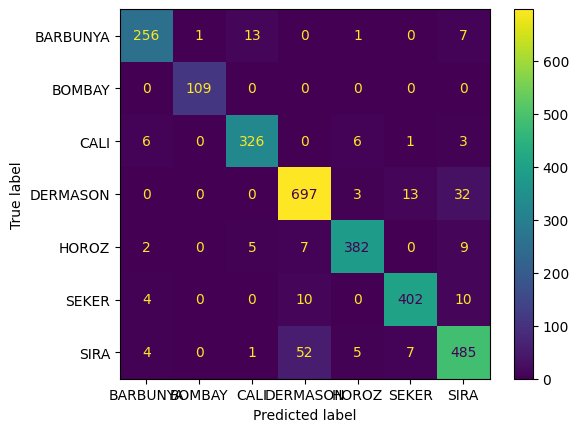

In [ ]:
final_ada.fit(X_train, y_train)
y_pred = final_ada.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=final_ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_ada.classes_)
disp.plot()

### SVC

0.9328436516264428
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.94      0.95       278
      BOMBAY       0.99      1.00      1.00       109
        CALI       0.95      0.96      0.96       342
    DERMASON       0.91      0.93      0.92       745
       HOROZ       0.97      0.94      0.96       405
       SEKER       0.96      0.96      0.96       426
        SIRA       0.89      0.87      0.88       554

    accuracy                           0.93      2859
   macro avg       0.95      0.94      0.94      2859
weighted avg       0.93      0.93      0.93      2859



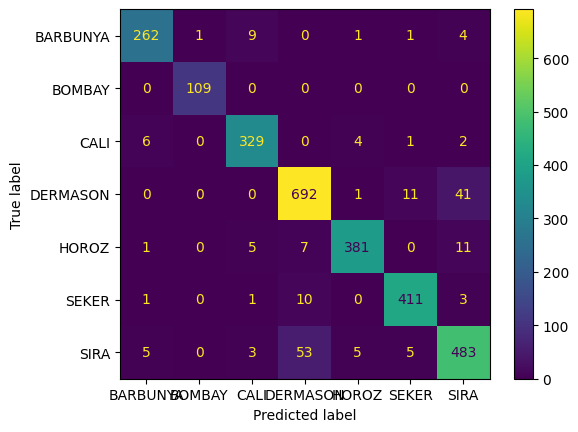

In [12]:
from sklearn.svm import SVC

svc = SVC(C=30, kernel='rbf', random_state=311, tol=1e-1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=svc.classes_)
disp.plot()


### Kroswalidacja SVC

In [13]:
param_grid = {"C": [1, 10, 20, 30, 100], "kernel": ['linear', 'rbf']}
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=7, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=SVC(C=30, random_state=311, tol=0.1),
             param_grid={'C': [1, 10, 20, 30, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

### SVC z Kroswalidacji

In [14]:
final_svc = grid_search.best_estimator_
final_svc.fit(X_train, y_train)
final_svc.predict(X_test)
y_pred = final_svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.931444561035327
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.94      0.95       278
      BOMBAY       0.99      1.00      1.00       109
        CALI       0.95      0.96      0.95       342
    DERMASON       0.90      0.93      0.92       745
       HOROZ       0.98      0.94      0.96       405
       SEKER       0.96      0.96      0.96       426
        SIRA       0.88      0.87      0.88       554

    accuracy                           0.93      2859
   macro avg       0.94      0.94      0.94      2859
weighted avg       0.93      0.93      0.93      2859



Daje minimalnie gorszą accuracy niż bez